In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
seaborn.set()

In [13]:
data = pd.read_csv('1.01.+Simple+linear+regression (1).csv')
data.head()


,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [14]:
# x - independent var, in machine learnig land input or feature
# y - dependent var, in machine learning land output or target
x = data['SAT']
y = data['GPA']

In [15]:
# check shape our inputs and target
x.shape
y.shape


(84,)

In [16]:
# we need reshape input and output into matrix
x_matrix = x.values.reshape(84,1) # or (-1,1)


x_matrix



array([[1714],
       [1664],
       [1760],
       [1685],
       [1693],
       [1670],
       [1764],
       [1764],
       [1792],
       [1850],
       [1735],
       [1775],
       [1735],
       [1712],
       [1773],
       [1872],
       [1755],
       [1674],
       [1842],
       [1786],
       [1761],
       [1722],
       [1663],
       [1687],
       [1974],
       [1826],
       [1787],
       [1821],
       [2020],
       [1794],
       [1769],
       [1934],
       [1775],
       [1855],
       [1880],
       [1849],
       [1808],
       [1954],
       [1777],
       [1831],
       [1865],
       [1850],
       [1966],
       [1702],
       [1990],
       [1925],
       [1824],
       [1956],
       [1857],
       [1979],
       [1802],
       [1855],
       [1907],
       [1634],
       [1879],
       [1887],
       [1730],
       [1953],
       [1781],
       [1891],
       [1964],
       [1808],
       [1893],
       [2041],
       [1893],
       [1832],
       [18

In [18]:
# create object in class LinearRegression
reg = LinearRegression()
     

# create shape of object
reg.fit(x_matrix,y)

LinearRegression()

In [19]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [20]:
# R-squared
reg.score(x_matrix,y)


0.40600391479679754

Result exactly the same as we found in stats model

In [21]:
#coefficients
reg.coef_

array([0.00165569])

array contains all coef, in our case we have one param so one coef

In [22]:
#intercept
reg.intercept_


0.2750402996602799

in this time we got single value instead of array, because simple linear regression always has single intercept

In [29]:
#make prediction
new_data = pd.DataFrame(data=[1740], columns=['SAT'])
new_data
#reg.predict((1740).values.reshape(-1,1))

,SAT
0,1740


In [33]:
new_data1 = pd.DataFrame({'SAT':[1750]})
new_data1

,SAT
0,1750


two methods create data frame in pandas

In [34]:
reg.predict(new_data)

/Users/elimatyunin/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751])

1) warning indicate that trainig data doesn't have name of col, we can just ignore the warning
2) result also an array, because predict method can have more than single value 

In [35]:
new_data1 = pd.DataFrame({'SAT':[1740, 1800, 2000]})
new_data1

,SAT
0,1740
1,1800
2,2000


In [36]:
reg.predict(new_data1)

/Users/elimatyunin/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.25527879, 3.5864164 ])

In [37]:
# join new data and predicted values
new_data1['Predicted_GPA'] = reg.predict(new_data1)
new_data1

/Users/elimatyunin/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1800,3.255279
2,2000,3.586416


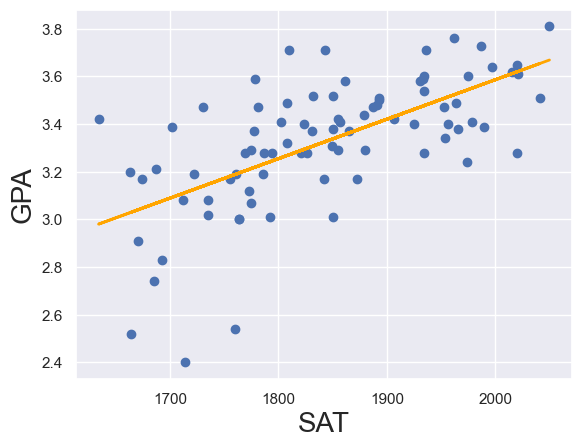

In [41]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x, yhat, lw=2, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()